In [1]:
# pip install diagrams
from diagrams import Cluster, Diagram
from diagrams.c4 import \
    Container, \
    Database, \
    Person, \
    Relationship, \
    System, \
    SystemBoundary


SHOW_DIAGRAMS = False


def basic_block(label, description=''):
    return Container(
        label,
        description=description,
        type='',
        height='0.6',
    )


class PresentationDiagram(Diagram):
    def __init__(self, filename, **kwargs):
        graph_attr = {
            'pad': '0.25',
        }
        graph_attr.update(kwargs.get('graph_attr', {}))
        super_kwargs = {
            'filename': filename,
            'outformat': 'svg',
            'show': SHOW_DIAGRAMS,
            'graph_attr': graph_attr,
        }
        super_kwargs.update(kwargs)
        super().__init__(**super_kwargs)         

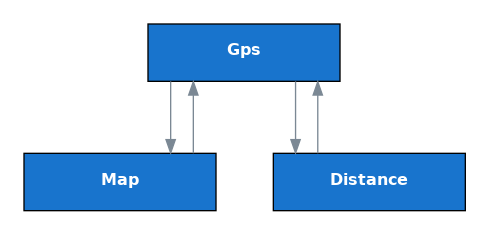

In [2]:
polling_diag = PresentationDiagram('polling', direction="TB")
with polling_diag:
    gps = basic_block('Gps')
    component1 = basic_block('Map')
    component2 = basic_block('Distance')
        
    component1 >> gps >> component1
    component2 >> gps >> component2
polling_diag

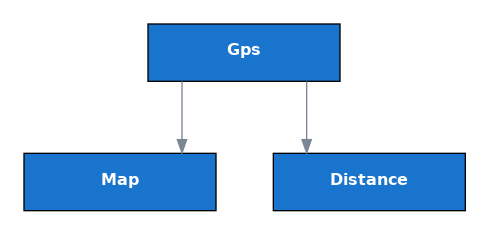

In [4]:
push_diagram = PresentationDiagram('push', direction='TB')
with push_diagram:
    gps = basic_block('Gps')
    component1 = basic_block('Map')
    component2 = basic_block('Distance')
        
    gps >> component1
    gps >> component2
push_diagram